<a href="https://colab.research.google.com/github/Kathan-Vakharia/Exploring-Ebay-Car-Sales-Data/blob/main/Exploring_Ebay_Cars_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

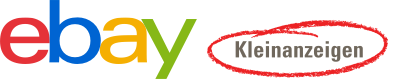

# Abstract

In this project, we'll explore data set of used cars from [eBay Kleinanzeigen](https://www.ebay-kleinanzeigen.de/), a classifieds section of the German eBay website.The dataset can found [here](https://data.world/data-society/used-cars-data). But I have used a modified(dirtier) version  of the dataset provided by Dataquest. The main aim of this project is to apply **Data Cleaning** and **Analyse** various car listings using `pandas` library of python.

## Data Dictionary
<ul>
<li><code>dateCrawled</code> - When this ad was first crawled. All field-values are taken from this date.</li>
<li><code>name</code> - Name of the car.</li>
<li><code>seller</code> - Whether the seller is private or a dealer.</li>
<li><code>offerType</code> - The type of listing</li>
<li><code>price</code> - The price on the ad to sell the car.</li>
<li><code>abtest</code> - Whether the listing is included in an <a href="https://www.leanplum.com/blog/test-group-vs-control-group/">A/B test</a>.</li>
<li><code>vehicleType</code> - The vehicle Type.</li>
<li><code>yearOfRegistration</code> - The year in which the car was first registered.</li>
<li><code>gearbox</code> - The transmission type.</li>
<li><code>powerPS</code> - The power of the car in PS(german acronym for horsepower).</li>
<li><code>model</code> - The car model name.</li>
<li><code>odometer</code> - How many kilometers the car has driven.</li>
<li><code>monthOfRegistration</code> - The month in which the car was first registered.</li>
<li><code>fuelType</code> - What type of fuel the car uses.</li>
<li><code>brand</code> - The brand of the car.</li>
<li><code>notRepairedDamage</code> - If the car has a damage which is not yet repaired.</li>
<li><code>dateCreated</code> - The date on which the eBay listing was created.</li>
<li><code>nrOfPictures</code> - The number of pictures in the ad.</li>
<li><code>postalCode</code> - The postal code for the location of the vehicle.</li>
<li><code>lastSeenOnline</code> - When the crawler saw this ad last online.</li>
</ul>

# Import Libaries

In [1]:
# importing libraries
import numpy as np
import pandas as pd

# Read Data

In [2]:
url = "https://raw.githubusercontent.com/Kathan-Vakharia/Exploring-Ebay-Car-Sales-Data/main/autos.csv"
autos = pd.read_csv(url, encoding="Latin-1")

In [3]:
autos.head(n=6)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21


# Examining Columns

In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

- There are **50000** rows and **20** columns in our dataset. And most of the columns are `strings`.
- Even the dates are represented as strings.


In [5]:
#Which columns contain null values?
null_cols = autos.isna().any()
null_cols[null_cols]

vehicleType          True
gearbox              True
model                True
fuelType             True
notRepairedDamage    True
dtype: bool

- Thus, following columns contains `null` values:
    - `vehicleType`
    - `gearbox`
    - `model`
    - `fuelType`
    - `notRepairedDamage`

In [6]:
# How many % of data in each column is null
per_null = autos.isna().sum()/autos.shape[0] * 100
per_null[per_null != 0]

vehicleType          10.190
gearbox               5.360
model                 5.516
fuelType              8.964
notRepairedDamage    19.658
dtype: float64

- No column contains more than **~20%** `null` values.

# Cleaning Column Names
We can see below that column names are in **camelCase** but in python, **snake_case** is preferred. 

- Let's convert column names to **snake_case** and **reword** some other column names so they are more descriptive.

In [7]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [8]:
new_cols = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_pictures', 'postal_code',
       'last_seen']
autos.columns = new_cols
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


# Initial Exploration and Cleaning

Initially we will look for:

- Text/Numeric columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis.
- Examples of numeric data stored as text which can be cleaned and converted.

In [9]:
#summary stats for numerical columns
autos.describe()

,registration_year,power_ps,registration_month,num_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


Noteworthy Observations:
- `registration_year`'s minimum value is **1000** and maximum value is **9999** which is not possible.
- `power_ps`'s minimum value is **0** maximun value is **~17K** horse power which again is not possible till date. [ref](https://autowise.com/highest-horsepower-cars/)
- `registration_month`'s minimum value is **0** and maximum value is **12**, which is again not possible as there are only **12** months in a year
- There seems to be something wrong with `num_pictures` column as all of its statistics(except count) is zero. 

For now, let's examine `num_pictures` column more,

In [10]:
autos["num_pictures"].value_counts()

0    50000
Name: num_pictures, dtype: int64

It turns out that all the values in `num_pictures` column are zeros. Thus, this column is of no use to us for data analysis and we'll happily drop it. But before we do that, let's see if have some useless text column that needs to be dropped?

In [11]:
#summary stats for text columns
autos.describe(include=['O'])

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,gearbox,model,odometer,fuel_type,brand,unrepaired_damage,ad_created,last_seen
count,50000,50000,50000,50000,50000,50000,44905,47320,47242,50000,45518,50000,40171,50000,50000
unique,48213,38754,2,2,2357,2,8,2,245,13,7,40,2,76,39481
top,2016-03-30 17:37:35,Ford_Fiesta,privat,Angebot,$0,test,limousine,manuell,golf,"150,000km",benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,36993,4024,32424,30107,10687,35232,1946,8


Noteworthy observations:
- `seller` and `offer_type` column have 49,999 out of 50,000 values to be **privat** and **Angebot** respectively. This columns are not gonna help us in our analysis since they contain same values in almost all the entries, so we have to drop them.

Let's drop, `seller`, `offer_type`, `num_pictures` columns before we go any further.

In [12]:
autos.drop(columns=["seller", "offer_type", "num_pictures"], inplace=True)
autos.head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


Moreover, `price` and `odometer` columns are stored as text since their values are numbers concatenated with some special characters. 
We need to remove those special characters, and convert this columns into numeric ones.

1. Converting `price` column from text to numeric


In [13]:
#find what to remove
autos["price"].value_counts()

$0          1421
$500         781
$1,500       734
$2,500       643
$1,200       639
            ... 
$12,333        1
$13,399        1
$2,195         1
$6,545         1
$139,997       1
Name: price, Length: 2357, dtype: int64

In [14]:
autos["price"] = (autos["price"]
                  .str.replace("$", "")
                  .str.replace(",", "")
                  .astype(int) 
                  )
autos["price"].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int64

2. Converting `odometer` from text to numeric.

In [15]:
#find what to remove
autos["odometer"].value_counts()

150,000km    32424
125,000km     5170
100,000km     2169
90,000km      1757
80,000km      1436
70,000km      1230
60,000km      1164
50,000km      1027
5,000km        967
40,000km       819
30,000km       789
20,000km       784
10,000km       264
Name: odometer, dtype: int64

In [16]:
autos["odometer"] = (autos["odometer"]
                     .str.replace(",", "")
                     .str.replace("km","")
                     .astype(int)
                     )
autos["odometer"].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: int64

let's rename the `odometer` column to `odometer_km` to make it look more descriptive.

In [17]:
autos.rename(columns={"odometer":"odometer_km"}, inplace=True)
autos["odometer_km"].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int64

# Exploring `odometer` and `price` columns

In [18]:
print("Unique Odometer Readings:", autos["odometer_km"].unique().shape[0])
autos[["odometer_km"]].describe()

Unique Odometer Readings: 13


,odometer_km
count,50000.000000
mean,125732.700000
std,40042.211706
min,5000.000000
25%,125000.000000
50%,150000.000000
75%,150000.000000
max,150000.000000


In [19]:
autos["odometer_km"].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

Observations:
- The values are rounded, it means the seller had to choose from pre-set options for this field. Moreover, there are more vehicles with high mileage.

In [20]:
print("Unique prices: ", autos["price"].unique().shape[0])
autos[["price"]].describe()

Unique prices:  2357


,price
count,5.000000e+04
mean,9.840044e+03
std,4.811044e+05
min,0.000000e+00
25%,1.100000e+03
50%,2.950000e+03
75%,7.200000e+03
max,1.000000e+08


In [21]:
#top prices
autos["price"].value_counts().sort_index(ascending=False).head(15)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
Name: price, dtype: int64

- Some of the cars are really heavily priced. Some of them are even priced over $\$1$ million.
 <!-- Although cars can be priced over $\$1$ million but these are special cars and it is less likely that such cars will be on sites like ebay. [Ref](https://financesonline.com/10-most-expensive-items-ever-sold-on-ebay-top-spot-bought-for-168m/) -->


In [22]:
#least prices
autos["price"].value_counts().sort_index().head(15)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
Name: price, dtype: int64

- There are **1421** entries of cars with a price tag of $\$0$ which is obviously not valid. And since ebay is an auction site, it completely legitimate to have items starting at $\$1$.

- We will drop all the cars prices less than $\$0$ and more than $\$350,000$ because it seems prices after that is increasing very fast.

    - $345000 \rightarrow 350,000 \rightarrow 999990$ 


In [23]:
#including prices in range[1, 350000]
autos= autos[autos["price"].between(1, 350000)]
#confirming the change
autos["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

# Exploring Date Columns

Following are the date columns,

- `date_crawled`
- `registration_year`
- `registration_month`
- `ad_created`
- `last_seen`

`registration_year` and `registration_month` are stored as **numeric** values

`date_crawled`, `ad_created` and `last_seen` are stored as **string** values.

In [24]:
#columns which should be treated as date
date_cols = {"strings": ["date_crawled", "ad_created","last_seen"],
             "numeric":["registration_year","registration_month"]
             }

#getting sense of how date is stored as strings
autos[date_cols["strings"]][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


- It seems like dates in these columns are stored in following format, **YYYY-MM-DD HH:MM:SS**

In [25]:
#percentage distribution of date_crawled
print("Unique Entries:", autos["date_crawled"].str[:10].unique().shape[0])
(autos["date_crawled"]
 .str[:10]
 .value_counts(normalize=True, dropna=False)
 .sort_index()
)*100

Unique Entries: 34


2016-03-05    2.532688
2016-03-06    1.404304
2016-03-07    3.601359
2016-03-08    3.329558
2016-03-09    3.308967
2016-03-10    3.218367
2016-03-11    3.257490
2016-03-12    3.691959
2016-03-13    1.566972
2016-03-14    3.654896
2016-03-15    3.428395
2016-03-16    2.960980
2016-03-17    3.162772
2016-03-18    1.291053
2016-03-19    3.477813
2016-03-20    3.788737
2016-03-21    3.737259
2016-03-22    3.298672
2016-03-23    3.222485
2016-03-24    2.934212
2016-03-25    3.160712
2016-03-26    3.220426
2016-03-27    3.109235
2016-03-28    3.486050
2016-03-29    3.409863
2016-03-30    3.368681
2016-03-31    3.183363
2016-04-01    3.368681
2016-04-02    3.547823
2016-04-03    3.860805
2016-04-04    3.648718
2016-04-05    1.309585
2016-04-06    0.317101
2016-04-07    0.140019
Name: date_crawled, dtype: float64

- We can see that the site was crawled almost everyday in one month period in $March$ and $April$ of year $2016$ by the crawler.

- Also the distribution is fairly uniform.

In [26]:
#percentage distribution of last_seen: The ad was removed after this date
#presumably because the car was sold
print("Unique Entries:", autos["last_seen"].str[:10].unique().shape[0])
(autos["last_seen"]
 .str[:10]
 .value_counts(normalize=True, dropna=False)
 .sort_index()
)*100

Unique Entries: 34


2016-03-05     0.107073
2016-03-06     0.432410
2016-03-07     0.539483
2016-03-08     0.741275
2016-03-09     0.959539
2016-03-10     1.066612
2016-03-11     1.237517
2016-03-12     2.378256
2016-03-13     0.889529
2016-03-14     1.260167
2016-03-15     1.587563
2016-03-16     1.645218
2016-03-17     2.808607
2016-03-18     0.735097
2016-03-19     1.583445
2016-03-20     2.065273
2016-03-21     2.063214
2016-03-22     2.137342
2016-03-23     1.853186
2016-03-24     1.976732
2016-03-25     1.921137
2016-03-26     1.680222
2016-03-27     1.564913
2016-03-28     2.085864
2016-03-29     2.234119
2016-03-30     2.477093
2016-03-31     2.378256
2016-04-01     2.279419
2016-04-02     2.491506
2016-04-03     2.520334
2016-04-04     2.448265
2016-04-05    12.476063
2016-04-06    22.180583
2016-04-07    13.194688
Name: last_seen, dtype: float64

The last three days contain a disproportionate amount of `last_seen` values. Given that these are **6-10 times** the values from the previous days, it's unlikely that there was a massive spike in sales, and more likely that these values are to do with the crawling period ending and don't indicate car sales.

Note: It is not possible for the crawler to see all the ads everyday!

In [27]:
#percentage distribution of ad_created
print("Unique Entries:", autos["ad_created"].str[:10].unique().shape[0])
(autos["ad_created"]
 .str[:10]
 .value_counts(normalize=True, dropna=False)
 .sort_index()
)*100

Unique Entries: 76


2015-06-11    0.002059
2015-08-10    0.002059
2015-09-09    0.002059
2015-11-10    0.002059
2015-12-05    0.002059
                ...   
2016-04-03    3.885514
2016-04-04    3.685782
2016-04-05    1.181921
2016-04-06    0.325337
2016-04-07    0.125605
Name: ad_created, Length: 76, dtype: float64

In [28]:
(autos["ad_created"]
 .str[:10]
 .value_counts(normalize=True, dropna=False)
 .sort_index()
)*100

2015-06-11    0.002059
2015-08-10    0.002059
2015-09-09    0.002059
2015-11-10    0.002059
2015-12-05    0.002059
                ...   
2016-04-03    3.885514
2016-04-04    3.685782
2016-04-05    1.181921
2016-04-06    0.325337
2016-04-07    0.125605
Name: ad_created, Length: 76, dtype: float64

In [29]:
#distribution of registration_year
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

- `registration_year`'s minimum value is **1000** (way before cars were invented) and maximum value is **9999** (many years into the future) which is not possible.

# Dealing with Incorrect `registration_year` Data

The automobile was first invented and perfected in Germany and France in the late 1800s. [ref](https://www.history.com/topics/inventions/automobiles)

So Realistically all the `registration_year` values less than $1800$ are not possible. Moreover, the crawler crawled the site in $2016$ so the values after $2016$ are also not possible.

Let's see how many percentage of values are not in the realistic range of $[1800, 2016]$ and if we can drop them.

In [30]:
np.logical_not(autos["registration_year"].between(1800, 2016)).sum()/autos.shape[0] * 100

3.875218778956038

- There are ~4% of non-realistic values so we'll happily drop them.

In [31]:
#keep only entries whose `registration_year` is in realistic range
autos = autos.loc[autos["registration_year"].between(1800, 2016)]
#check if column was updated
autos["registration_year"].describe()

count    46683.000000
mean      2002.902063
std          7.306668
min       1800.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

In [32]:
#distribution of modified `registration_year` col
print("Unique Values:", autos["registration_year"].unique().shape[0])
(autos["registration_year"].value_counts(normalize=True, dropna=False)*100).head(20)

Unique Values: 79


2000    6.760491
2005    6.289227
1999    6.205685
2004    5.790116
2003    5.781548
2006    5.719427
2001    5.646595
2002    5.325279
1998    5.061800
2007    4.877579
2008    4.744768
2009    4.466294
1997    4.179252
2011    3.476640
2010    3.403809
1996    2.941113
2012    2.806161
1995    2.628366
2016    2.613371
2013    1.720112
Name: registration_year, dtype: float64

It seems like majority of the vehicles were first registered in past $20-30$ years itself.

In [33]:
#how many % vehicles are in top 20
(autos["registration_year"].value_counts(normalize=True, dropna=False)*100).head(20).sum()

90.4376325428957

# Exploring Price By Brand


In [34]:
#unique brands
autos["brand"].unique()

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'sonstige_autos',
       'opel', 'mazda', 'porsche', 'mini', 'toyota', 'dacia', 'nissan',
       'jeep', 'saab', 'volvo', 'mitsubishi', 'jaguar', 'fiat', 'skoda',
       'subaru', 'kia', 'citroen', 'chevrolet', 'hyundai', 'honda',
       'daewoo', 'suzuki', 'trabant', 'land_rover', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

In [35]:
#percentage distribution of "brand"
(autos["brand"]
 .value_counts(normalize=True)
 .sort_values(ascending=False)*100)

volkswagen        21.125463
bmw               11.004006
opel              10.757663
mercedes_benz      9.645910
audi               8.656256
ford               6.989696
renault            4.714778
peugeot            2.983956
fiat               2.564103
seat               1.827218
skoda              1.640854
nissan             1.527323
mazda              1.518754
smart              1.415933
citroen            1.400938
toyota             1.270270
hyundai            1.002506
sonstige_autos     0.981085
volvo              0.914680
mini               0.876122
mitsubishi         0.826853
honda              0.784011
kia                0.706895
alfa_romeo         0.664053
porsche            0.612643
suzuki             0.593364
chevrolet          0.569801
chrysler           0.351306
dacia              0.263479
daihatsu           0.250627
jeep               0.227063
subaru             0.214211
land_rover         0.209927
saab               0.164942
jaguar             0.156374
daewoo             0

- **Volkswagen** has by far the most listings followed by **BMW** and **Opel** . 

- It is evident that **German** manufacturers dominate the listings since top **five** spots are held by them.

- Alot of brands don't have significant amount of listings. 

So we'll limit our analyis to brands that have more than $5\%(2500)$ listings.

In [36]:
brand_counts = (autos["brand"]
                 .value_counts(normalize=True)
                 .sort_values(ascending=False)
                 )
common_brands = brand_counts[brand_counts.gt(0.05)].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


- Let's calculate **average** price by most common brand.

In [37]:
#Using groupby
autos.groupby("brand")["price"].mean().loc[common_brands].round()

volkswagen       5402.0
bmw              8333.0
opel             2975.0
mercedes_benz    8628.0
audi             9337.0
ford             3749.0
Name: price, dtype: float64

In [38]:
#using for loop
brand_mean_prices = {}
for brand in common_brands:
    avg_price = autos.loc[autos["brand"] == brand, "price"].mean()
    brand_mean_prices[brand] = round(avg_price)

brand_mean_prices

{'audi': 9337,
 'bmw': 8333,
 'ford': 3749,
 'mercedes_benz': 8628,
 'opel': 2975,
 'volkswagen': 5402}

- **audi**, **bmw**, **mercedes_benz** are more expensive while **opel** and **ford** are less expensive.
- **volkswagen** lies in between. That might also explain the reason for its poplularity: it may give best of both worlds!

# Exploring Mileage
Let's see if milege has anything to do with the average prices.

In [39]:
#using groupby
autos.groupby("brand")[["price", "odometer_km"]].mean().loc[common_brands].round()

,price,odometer_km
volkswagen,5402.0,128707.0
bmw,8333.0,132573.0
opel,2975.0,129310.0
mercedes_benz,8628.0,130788.0
audi,9337.0,129157.0
ford,3749.0,124266.0


In [40]:
#using for loop
brand_mean_mileage = {}
for brand in common_brands:
    avg_mileage = autos.loc[autos["brand"] == brand, "odometer_km"].mean()
    brand_mean_mileage[brand] = round(avg_mileage)

brand_mean_mileage

{'audi': 129157,
 'bmw': 132573,
 'ford': 124266,
 'mercedes_benz': 130788,
 'opel': 129310,
 'volkswagen': 128707}

In [44]:
brand_info = pd.DataFrame(data = {"avg_price":brand_mean_prices, "avg_mileage":brand_mean_mileage})
brand_info

,avg_price,avg_mileage
volkswagen,5402,128707
bmw,8333,132573
opel,2975,129310
mercedes_benz,8628,130788
audi,9337,129157
ford,3749,124266


- The range of car mileages does not vary as much as the prices do by brand.